In [5]:
!pip install jovian --upgrade --quiet

In [6]:
import os 
import torchvision
import torch
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [8]:
project_name='05-cifar10-cnn-model'

In [9]:
dataset_url="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

In [10]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

In [11]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes=os.listdir(data_dir+'/train')
print(classes)

['train', 'test']
['truck', 'airplane', 'cat', 'deer', 'horse', 'automobile', 'dog', 'frog', 'ship', 'bird']


In [12]:
airplane_files=os.listdir(data_dir+'/train/airplane')
print('No of training examples for airplanes: ',len(airplane_files))
print(airplane_files[:5])

No of training examples for airplanes:  5000
['3073.png', '3945.png', '1341.png', '2948.png', '4330.png']


In [13]:
ship_test_files=os.listdir(data_dir+'/test/ship')
print('No of test examples for ships: ',len(ship_test_files))
print(ship_test_files[:5])

No of test examples for ships:  1000
['0725.png', '0902.png', '0852.png', '0752.png', '0707.png']


In [14]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [15]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

In [16]:
img,label=dataset[0]
print(img.shape,label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [17]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [20]:
def show_example(img,label):
  print('Label:',dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label: airplane (0)


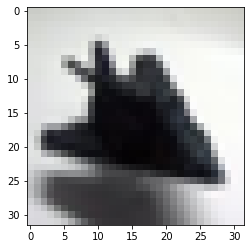

In [21]:
show_example(*dataset[0])

Label: bird (2)


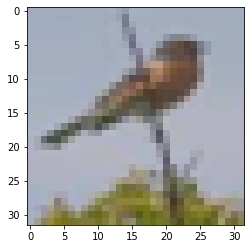

In [28]:
show_example(*dataset[11902])

In [29]:
!pip install jovian --upgrade -q

In [30]:
import jovian

In [31]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/sagarp3199/05-cifar10-cnn-model


'https://jovian.ai/sagarp3199/05-cifar10-cnn-model'

In [32]:
random_seed=42
torch.manual_seed(random_seed)

In [34]:
val_size=5000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [35]:
jovian.log_dataset(dataset_url=dataset_url,val_size=val_size,random_seed=random_seed)

[jovian] Dataset logged.


In [36]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [37]:
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

In [38]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

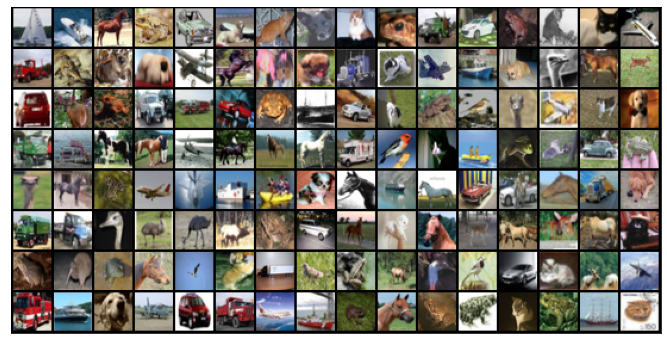

In [39]:
show_batch(train_dl)

In [40]:
jovian.commit(project=project_name,environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/sagarp3199/05-cifar10-cnn-model


'https://jovian.ai/sagarp3199/05-cifar10-cnn-model'

In [41]:
def apply_kernel(image,kernel):
  ri,ci=image.shape
  rk,ck=kernel.shape
  ro,co=ri-rk+1,ci-ck+1
  output=torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output[i,j]=torch.sum(image[i:i+rk,j:j+ck]*kernel)
  return output

In [42]:
sample_image=torch.tensor([
                           [3,3,2,1,0],
                           [0,0,1,3,1],
                           [3,1,2,2,3],
                           [2,0,0,2,2],
                           [2,0,0,0,1]
],dtype=torch.float32)

sample_kernel=torch.tensor([
                            [0,1,2],
                            [2,2,0],
                            [0,1,2]
],dtype=torch.float32)

apply_kernel(sample_image,sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [44]:
simple_model=nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [45]:
for images,labels in train_dl:
  print('images.shape: ',images.shape)
  out=simple_model(images)
  print('out.shape: ',out.shape)
  break

images.shape:  torch.Size([128, 3, 32, 32])
out.shape:  torch.Size([128, 8, 16, 16])


In [58]:
class ImageClassificationBase(nn.Module):
  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    acc=accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x['val_acc']for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}

  def epoch_end(self,epoch,result):
    print('Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.
          format(epoch,result['train_loss'],result['val_loss'],result['val_acc']))
    
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [59]:
class Cifar10CnnModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Flatten(),
        nn.Linear(256*4*4,1024),
        nn.ReLU(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,xb):
    return self.network(xb) 

In [60]:
model=Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [61]:
for images,labels in train_dl:
  print('images.shape:',images.shape)
  out=model(images)
  print('out.shape',out.shape)
  print('out[0]:',out[0])
  break

images.shape: torch.Size([128, 3, 32, 32])


RuntimeError: ignored

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)
  def __len__(self):
    return len(self.dl)

In [ ]:
device=get_default_device()
device

In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
val_dl=DeviceDataLoader(val_dl,device)
to_device(model,device)

In [ ]:
jovian.commit(project=project_name)

In [62]:
def evaluate(model,val_loader):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    model.train()
    train_losses=[]
    for batch in train_loader:
      loss=model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result=evaluate(model,val_loader)
    result['train_loss']=torch.stack(train_losses).mean().item()
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [63]:
model=to_device(Cifar10CnnModel(),device)

In [64]:
evaluate(model,val_dl)

{'val_acc': 0.09998850524425507, 'val_loss': 2.303184747695923}

In [65]:
num_epochs=10
opt_func=torch.optim.Adam
lr=0.001

In [66]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs':num_epochs,
    'opt_func':opt_func.__name__,
    'batch_size': batch_size,
    'lr':lr
})

[jovian] Hyperparams logged.


In [67]:
history=fit(num_epochs,lr,model,train_dl,val_dl,opt_func)

Epoch [0], train_loss: 1.7892, val_loss: 1.4558, val_acc: 0.4527
Epoch [1], train_loss: 1.2713, val_loss: 1.1775, val_acc: 0.5739
Epoch [2], train_loss: 1.0233, val_loss: 1.0217, val_acc: 0.6346
Epoch [3], train_loss: 0.8545, val_loss: 0.8801, val_acc: 0.6851
Epoch [4], train_loss: 0.7327, val_loss: 0.8633, val_acc: 0.6941
Epoch [5], train_loss: 0.6313, val_loss: 0.7649, val_acc: 0.7363
Epoch [6], train_loss: 0.5278, val_loss: 0.7477, val_acc: 0.7447
Epoch [7], train_loss: 0.4438, val_loss: 0.7610, val_acc: 0.7479
Epoch [8], train_loss: 0.3660, val_loss: 0.8265, val_acc: 0.7542
Epoch [9], train_loss: 0.2993, val_loss: 0.8332, val_acc: 0.7657


In [68]:
def plot_accuracies(history):
  accuracies=[x['val_acc'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')

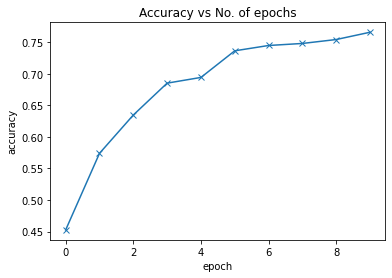

In [69]:
plot_accuracies(history)

In [71]:
def plot_losses(history):
  train_losses=[x.get('train_loss') for x in history]
  val_losses=[x['val_loss'] for x in history]
  plt.plot(train_losses,'-bx')
  plt.plot(val_losses,'-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

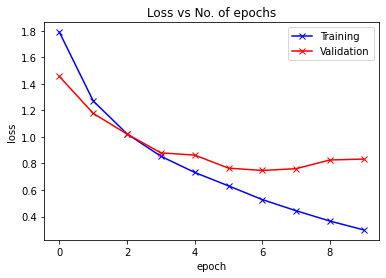

In [72]:
plot_losses(history)

In [73]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/sagarp3199/05-cifar10-cnn-model


'https://jovian.ai/sagarp3199/05-cifar10-cnn-model'

In [74]:
test_dataset=ImageFolder(data_dir+'/test',transform=ToTensor())

In [75]:
def predict_image(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return dataset.classes[preds[0].item()]

Label:  airplane , Predicted:  airplane


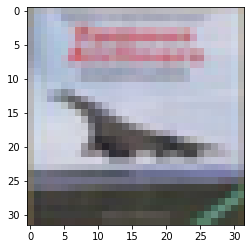

In [76]:
img,label=test_dataset[0]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label],', Predicted: ',predict_image(img,model))

Label:  automobile , Predicted:  automobile


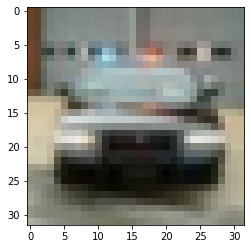

In [77]:
img,label=test_dataset[1003]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label],', Predicted: ',predict_image(img,model))

Label:  bird , Predicted:  deer


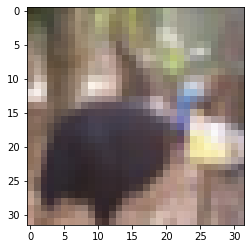

In [78]:
img,label=test_dataset[2044]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label],', Predicted: ',predict_image(img,model))

In [79]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size*2)device)
result=evaluate(model,test_loader)
result

SyntaxError: ignored

[jovian] Metrics logged.
